<a href="https://colab.research.google.com/github/monicamons12/30DayMapChallenge/blob/Monica/OSM_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install GDAL and Geopandas
!apt install gdal-bin python-gdal python3-gdal --quiet
!apt install python3-rtree --quiet
!pip install git+git://github.com/geopandas/geopandas.git --quiet
!pip install descartes --quiet
!pip install osmnx==1.1.1
!pip install folium

In [2]:
import pandas as pd
import geopandas as gpd
import osmnx
import folium
from folium.plugins import MousePosition
import matplotlib.pyplot as plt
import seaborn as sb

#Add Folium Map with plugins

*   Folium helps to add manipulated python data to Leaflet Map for visualization
*   It has in-built visualisation capabilities, added up by plugins (Draw, MiniMap, Geolocator, etc.,.)





In [106]:
map = folium.Map([13.1031, 80.1794], zoom_start=10, tiles="CartoDb dark_matter")
map.add_child(folium.ClickForMarker())
MousePosition().add_to(map)
from folium.plugins import MiniMap
MiniMap(tile_layer='Stamen WaterColor', position='bottomleft').add_to(map)
map

## Extracting Street Map from OSM
It is possible to extract networks from OSM using OSMNX package. 
Various ways to extract - by specifying city, by the input of bbox, from point/address.

network_type can be 'drive' or 'walk' or 'bike'

save_graph_geopackage can also be used to save the network graph as geopackage instead of shapefile as mentioned in the following code

In [80]:
place = "Chennai, India"
graph = osmnx.graph.graph_from_place(place, network_type='drive')
osmnx.io.save_graph_shapefile(graph)

/usr/local/lib/python3.7/dist-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


In [83]:
len(graph)

58921

In [82]:
nodes, streets = osmnx.graph_to_gdfs(graph)

In [84]:
nodes.head()

,y,x,highway,street_count,geometry
osmid,,,,,
30037235,13.080784,80.265167,traffic_signals,4,POINT (80.26517 13.08078)
30037236,13.080295,80.262785,traffic_signals,4,POINT (80.26278 13.08030)
30037239,13.079431,80.258773,traffic_signals,4,POINT (80.25877 13.07943)
30037240,13.079196,80.256659,traffic_signals,4,POINT (80.25666 13.07920)
30037241,13.078997,80.254681,traffic_signals,4,POINT (80.25468 13.07900)


In [85]:
streets.head()

osmid  oneway  ... service est_width
u        v          key                     ...                  
30037235 2197652486 0    209562047    True  ...     NaN       NaN
         254497449  0    237621838    True  ...     NaN       NaN
30037236 304918752  0     27768980   False  ...     NaN       NaN
         254497666  0    237621838    True  ...     NaN       NaN
         2486635736 0     27768980   False  ...     NaN       NaN

[5 rows x 16 columns]

In [108]:
street_types = pd.DataFrame(streets["highway"].apply(pd.Series)[0].value_counts().reset_index())
street_types.columns = ["type", "count"]

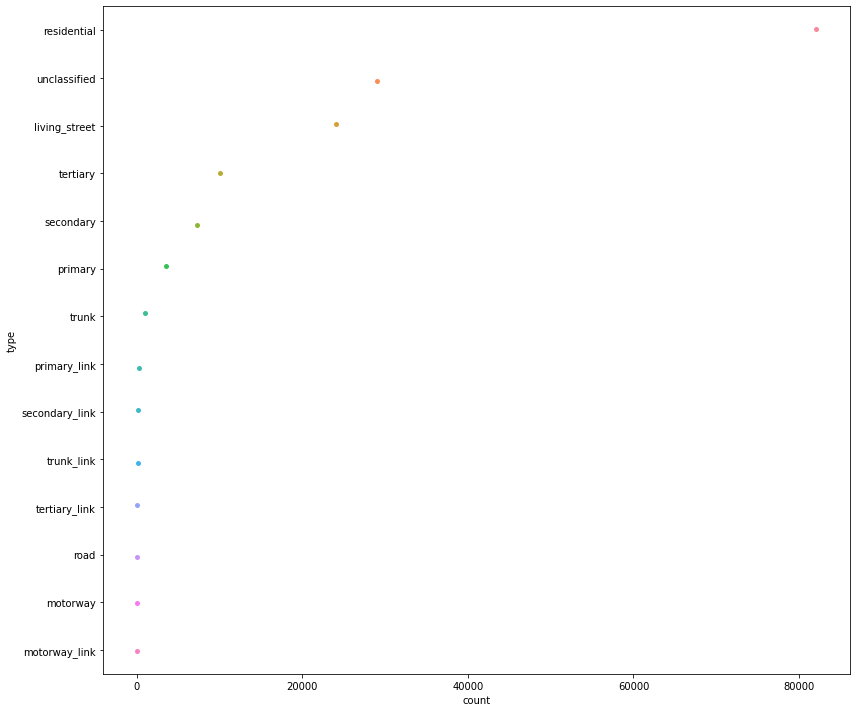

In [109]:
fig, ax = plt.subplots(figsize=(12,10))
sb.stripplot(y="type", x="count", data=street_types, ax=ax)
plt.tight_layout()
plt.savefig("stripplot.png")
#sb.barplot(y="type", x="count", data=street_types, ax=ax)
#plt.tight_layout()
#plt.savefig("barchart.png")

In [ ]:

style = {'color': '#F7DC6F', 'weight':'1'}
m = folium.Map([13.1031, 80.1794],zoom_start=15,tiles="CartoDb positron")
streetsJson = folium.GeoJson(streets, style_function=lambda x: style).add_to(m)
folium.GeoJsonTooltip(fields=['name'])
m.save("streets.html")
m

## Extract buildings from OSM

In [ ]:
buildings = osmnx.geometries.geometries_from_place(place, {'building': True})

In [ ]:
buildings.head()

In [ ]:
buildings.shape

In [ ]:
cols = ['amenity','building', 'name', 'tourism']
buildings[cols].head()

In [ ]:
list(buildings.columns)

In [ ]:
buildings["amenity"].apply(pd.Series)[0].value_counts()


In [ ]:

style_buildings = {'color':'#6C3483 ', 'fillColor': '#6C3483 ', 'weight':'1', 'fillOpacity' : 1}

m = folium.Map([13.1031, 80.1794],
               zoom_start=15,
               tiles="cartoDb positron")

buildingJson = folium.GeoJson(buildings[:1000], style_function=lambda x: style_buildings).add_to(m)
folium.GeoJsonTooltip(fields=['name','amenity'], labels=False).add_to(buildingJson)
m.save("buildings.html")
m

## Hospitals in Chennai

In [35]:
hospitals = osmnx.geometries.geometries_from_place(place, {'amenity':'hospital'})

In [ ]:
hospitals.head()

In [ ]:
hospitals.shape

In [ ]:
hospitals.columns

In [ ]:
columns =['name','name:en', 'healthcare', 'healthcare:speciality', 'opening_hours', 'operator:type', 'addr:street', 'addr:city','addr:postcode', 'contact:phone']
hospitals[columns].head()

In [76]:
hospital_points = hospitals[hospitals.geom_type == "Point"]

In [ ]:
m = folium.Map([13.1031, 80.1794], zoom_start=10, tiles="CartoDb dark_matter")
locs = zip(hospital_points.geometry.y, hospital_points.geometry.x)
for location in locs:
    folium.CircleMarker(location=location, popup=folium.Popup(location) , color = "#F4F6F6",   radius=2).add_to(m)
m.save("hospitals.html")
m

##Calculate Shortest Path using OSMNX and Plot Route



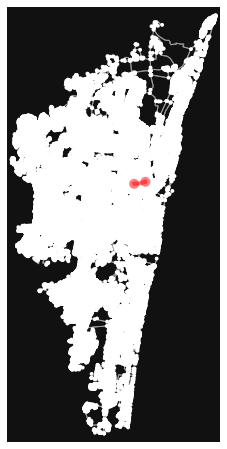

In [107]:
dist_array = osmnx.distance.shortest_path(graph, 30037235, 30037241 )
route = osmnx.plot.plot_graph_route(graph, dist_array, route_color='r')